# Breast Cancer Prediction using ML Models

Here are the steps and classification process for breast cancer prediction using Logistic Regression, Random Forest, and Gradient Boosting.

The dataset used in this classfication was Breast Cancer Wisconsin (Diagnostic) Dataset taken from UCI ML Repository.

# Import Libraries

The first step is to import the necessary Python libraries required for the breast cancer prediction analysis. These libraries provide the tools for data manipulation, visualization, model training, and evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, recall_score, precision_score

# Load and read dataset

This step loads the dataset using pandas read_csv() to make the data available for analysis and model building.

In [5]:
column_names = ['id', 'diagnosis','radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                'compactness_mean','concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
                'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
                'fractal dimension worst' ]

In [6]:
# reading data from the file and converting to csv format
BreastCancerData = pd.read_csv('wdbc.data', header= None, names=column_names)
BreastCancerData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
BreastCancerData.shape

(569, 32)

In [8]:
BreastCancerData.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [9]:
BreastCancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
# checking for null values
BreastCancerData.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal dimension worst    0
dtype: int64

# Data Preparation

In [11]:
#Checking for duplicate rows
duplicate_rows = BreastCancerData.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [12]:
# checking the total number of rows and columns in dataset
print("Total rows:", BreastCancerData.shape[0])
print("Total columns:", BreastCancerData.shape[1])

Total rows: 569
Total columns: 32


In [13]:
# describe the dataset
BreastCancerData.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
# Checking the unique values in diagnosis column which is target column also
BreastCancerData.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [15]:
# Seeing the count of malignant(M) and Benign(B) cells
BreastCancerData['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [16]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Data Visualization

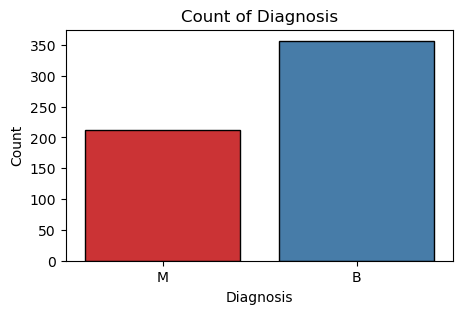

In [17]:
# Plotting the count of diagnosis
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', edgecolor = 'k', data=BreastCancerData, label="count", palette = "Set1")

# Adding labels
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Count of Diagnosis")
plt.show()

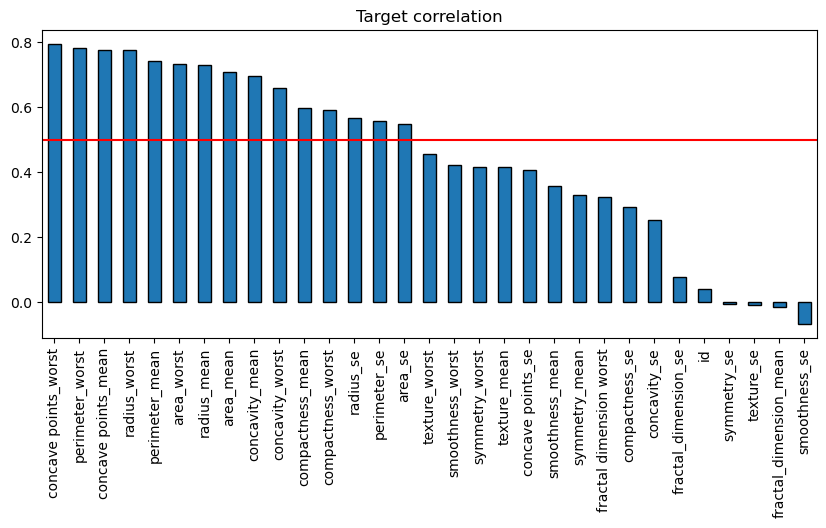

In [18]:
# Create a copy of the BreastCancerData dataframe to avoid modifying the original data
temp = BreastCancerData.copy()

# Map the 'diagnosis' column values from "B" (Benign) to 0 and "M" (Malignant) to 1
temp['diagnosis'] = temp['diagnosis'].map({"B":0, "M":1})

# Calculate the correlation of all features with the 'diagnosis' column and sort them in descending order
temp.corr()['diagnosis'].sort_values(ascending = False)[1:].plot(kind = 'bar',
                                                                 edgecolor = 'k',
                                                                figsize = (10, 4))
plt.axhline(0.5, c = 'r')
plt.grid(False)
plt.title("Target correlation");

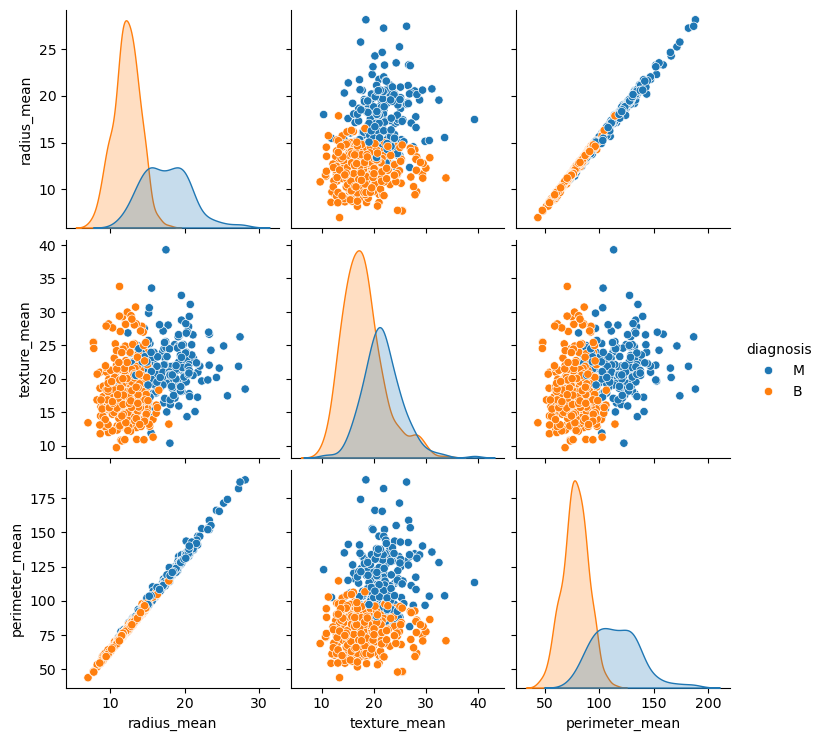

In [19]:
sns.pairplot(BreastCancerData.iloc[:,1:5],hue="diagnosis")

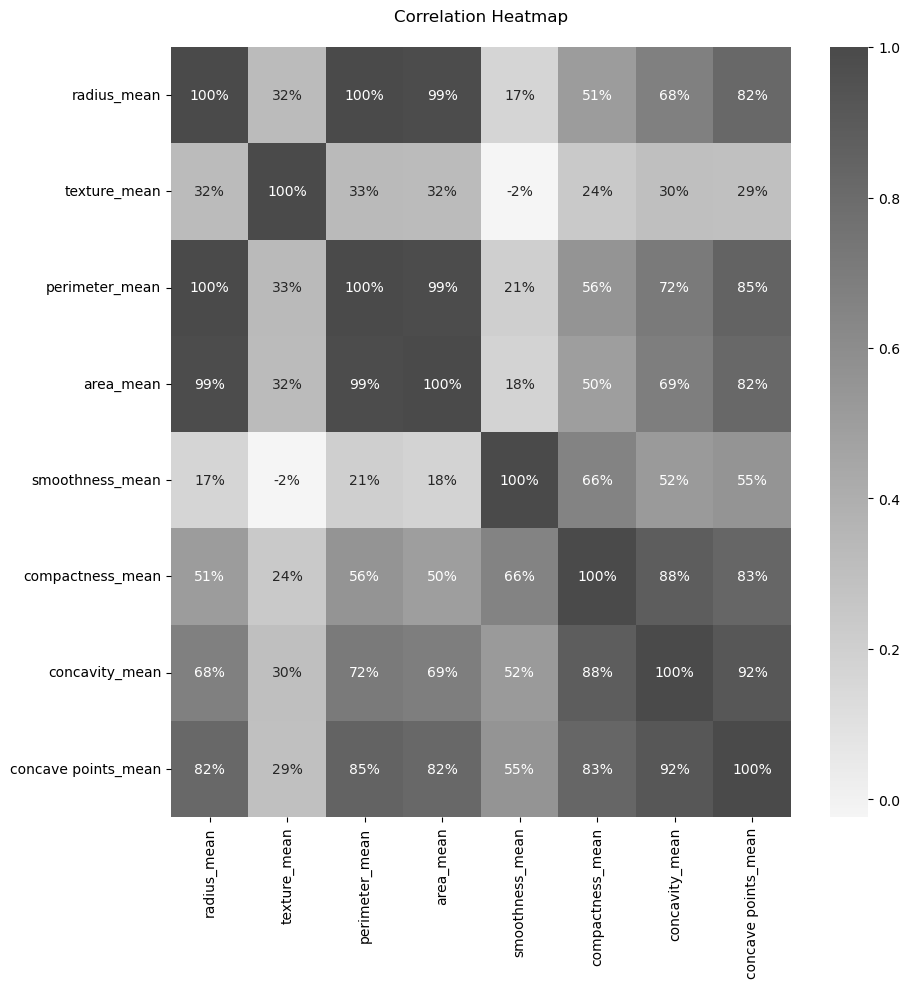

In [20]:
from matplotlib.colors import LinearSegmentedColormap

# Correlation heatmap of features  
plt.figure(figsize=(10,10))

custom_cmap = LinearSegmentedColormap.from_list("custom", ["#f5f5f5", "#4a4a4a"])
sns.heatmap(BreastCancerData.iloc[:,2:10].corr(), annot=True, fmt=".0%", cmap= custom_cmap)
plt.title("Correlation Heatmap\n")
plt.show()

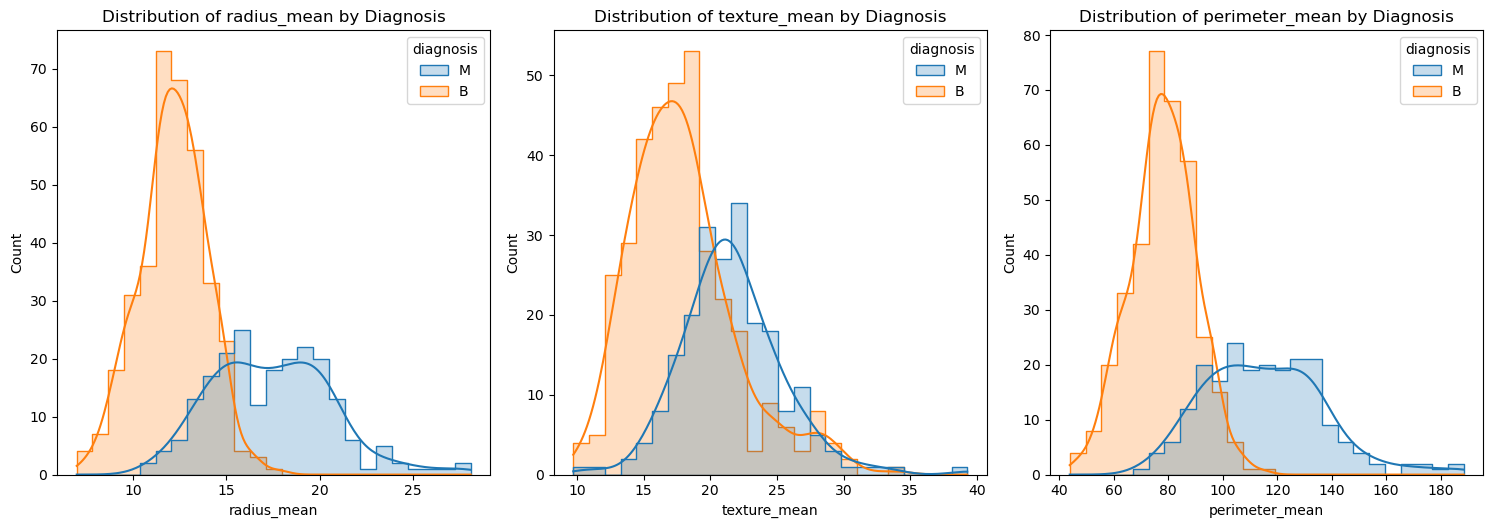

In [21]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = BreastCancerData.columns[2:5]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=BreastCancerData, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()

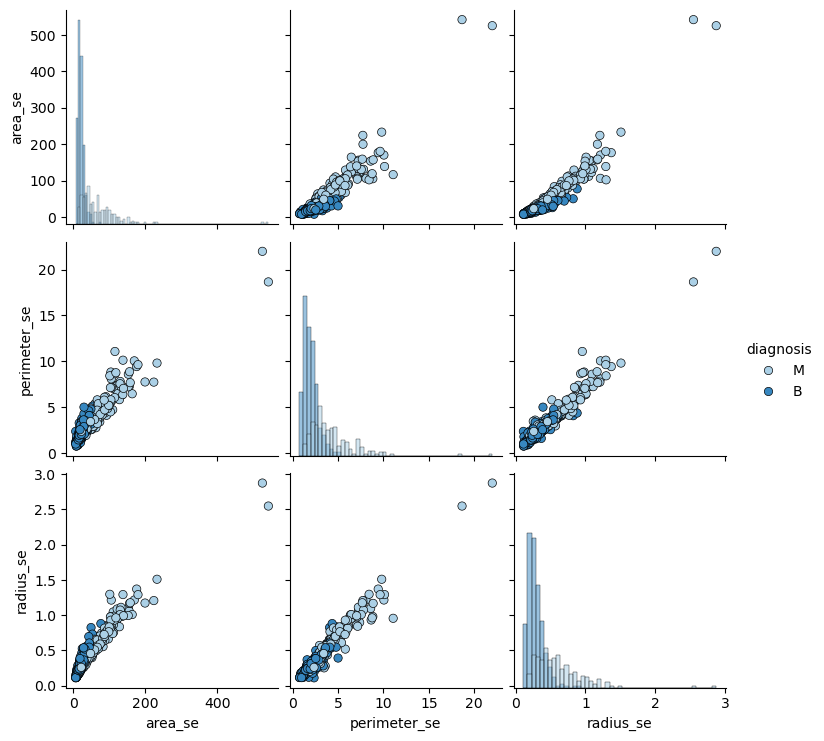

In [22]:
# Create a pairplot to visualize relationships between selected features
sns.pairplot(data = BreastCancerData, vars = ["area_se", "perimeter_se", "radius_se"],
            hue = "diagnosis", plot_kws = {"edgecolor":"k"},
             diag_kind = "hist", palette = "Blues");
plt.show()

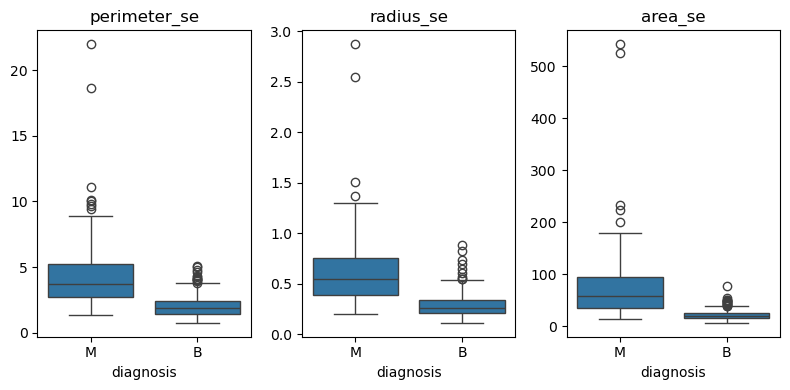

In [23]:
# Create a figure with 3 subplots arranged in 1 row and 3 columns, with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (8, 4))

# Plot boxplot for 'perimeter_se' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "perimeter_se", x = "diagnosis", ax = ax1)
ax1.set_ylabel("")
ax1.set_title("perimeter_se")

# Plot boxplot for 'radius_se' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "radius_se", x = "diagnosis", ax = ax2)
ax2.set_ylabel("")
ax2.set_title("radius_se")

# Plot boxplot for 'area_se' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "area_se", x = "diagnosis", ax = ax3)
ax3.set_ylabel("")
ax3.set_title("area_se")
plt.tight_layout();

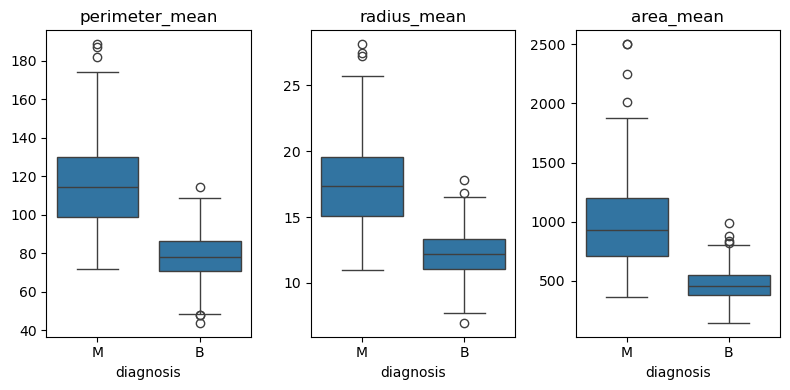

In [24]:
# Create a figure with 3 subplots arranged in 1 row and 3 columns, with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (8, 4))

# Plot boxplot for 'perimeter_mean' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "perimeter_mean", x = "diagnosis", ax = ax1)
ax1.set_ylabel("")
ax1.set_title("perimeter_mean")

# Plot boxplot for 'radius_mean' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "radius_mean", x = "diagnosis", ax = ax2)
ax2.set_ylabel("")
ax2.set_title("radius_mean")

# Plot boxplot for 'area_mean' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "area_mean", x = "diagnosis", ax = ax3)
ax3.set_ylabel("")
ax3.set_title("area_mean")
plt.tight_layout();

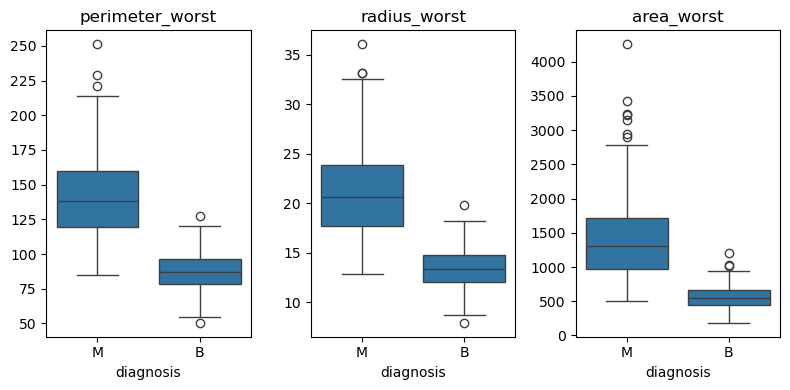

In [25]:
# Create a figure with 3 subplots arranged in 1 row and 3 columns, with a specified size
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize = (8, 4))

# Plot boxplot for 'perimeter_worst' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "perimeter_worst", x = "diagnosis", ax = ax1)
ax1.set_ylabel("")  # Remove y-axis label
ax1.set_title("perimeter_worst")

# Plot boxplot for 'radius_worst' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "radius_worst", x = "diagnosis", ax = ax2)
ax2.set_ylabel("")
ax2.set_title("radius_worst")

# Plot boxplot for 'area_worst' with 'diagnosis' as the categorical variable
sns.boxplot(data = BreastCancerData, y = "area_worst", x = "diagnosis", ax = ax3)
ax3.set_ylabel("")
ax3.set_title("area_worst")
plt.tight_layout(); #To prevent overlap of plots

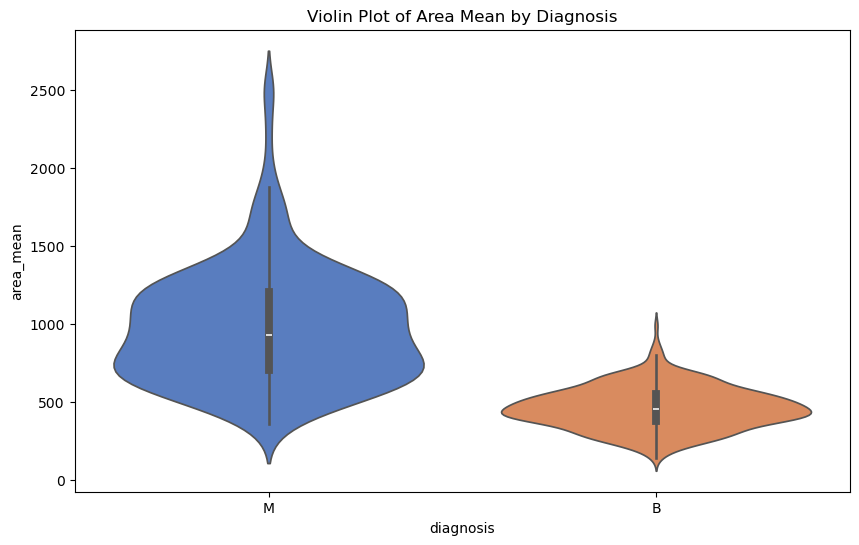

In [26]:
# Create a violin plot to visualize the distribution of 'area_mean' for each diagnosis category
plt.figure(figsize=(10, 6))
sns.violinplot(x="diagnosis", y="area_mean", data=BreastCancerData, palette="muted")
plt.title("Violin Plot of Area Mean by Diagnosis")
plt.show()

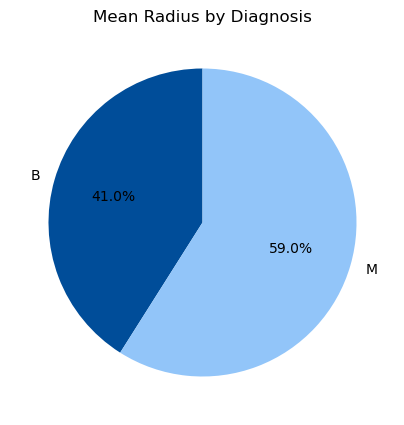

In [27]:
# Create a pie chart for distribution of mean radius by diagnosis
mean_radius_by_diagnosis = BreastCancerData.groupby('diagnosis')['radius_mean'].mean()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(mean_radius_by_diagnosis, labels=mean_radius_by_diagnosis.index, autopct='%1.1f%%', startangle=90, 
         colors=['#004D99', '#92C5F9'])
plt.title('Mean Radius by Diagnosis')
plt.show()

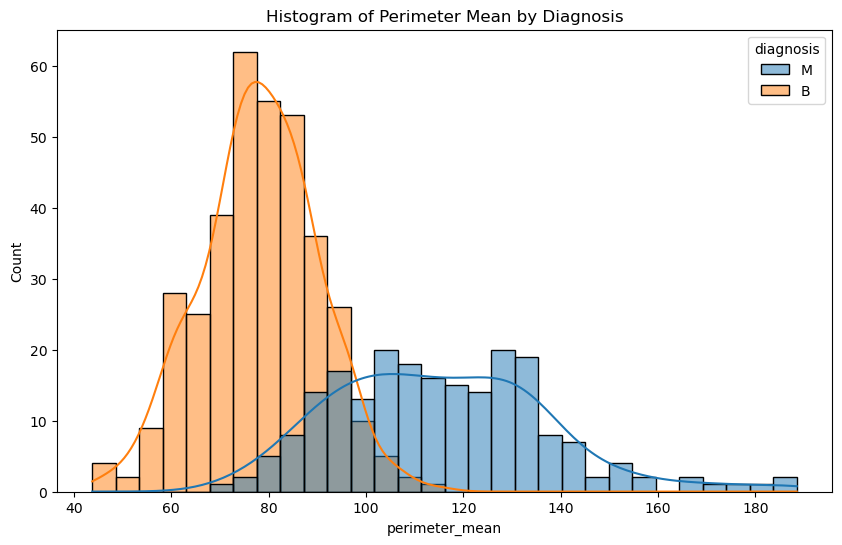

In [28]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a histogram to visualize the distribution of 'perimeter_mean' for each diagnosis category
sns.histplot(data=BreastCancerData, x="perimeter_mean", hue="diagnosis", kde=True, bins=30)

# Set the title of the plot
plt.title("Histogram of Perimeter Mean by Diagnosis")

# Display the plot
plt.show()

## Differentiating Feature and Target Variable

In [29]:
# Drop 'id' and 'diagnosis' columns from the dataset to create feature matrix X
X = BreastCancerData.drop(['id','diagnosis'],axis=1)

# Map 'diagnosis' column to binary values (M -> 1, B -> 0) to create target vector Y
Y = BreastCancerData['diagnosis'].map(lambda x: 1 if x == 'M' else 0)     

In [30]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

# Train Test Split

In [32]:
# Step 2: Splitting the dataset into training and testing dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

# Scaling the data

In [33]:
# Step 3: Scale features
scaler = StandardScaler() # Initialize the StandardScaler
X_train=scaler.fit_transform(X_train) 
X_test=scaler.transform(X_test)  # Scale test data

# Model

# 1. Logistic Regression

In [57]:
# Step 4: Train Logistic Regression Model
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [58]:
#Evaluating the Model
Y_pred = LR.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [59]:
# Calculate the training accuracy
train_accuracy = LR.score(X_train, Y_train) 

# Calculate the testing accuracy
test_accuracy = accuracy_score(Y_test, Y_pred)

# Print performance metrics
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Train Accuracy: 0.99
Test Accuracy: 0.96


In [60]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test,Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



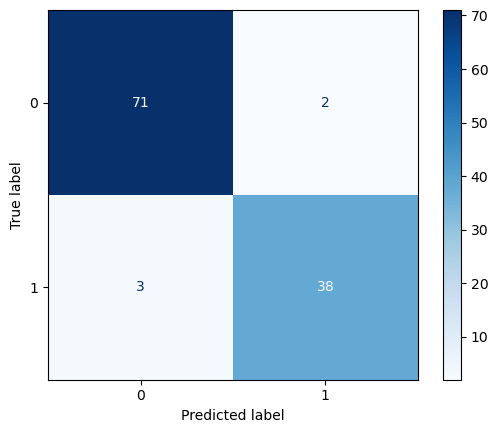

In [61]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
display.plot(cmap="Blues")
plt.show()

In [62]:
# Step 5: ROC and AUC

# Get predicted probabilities for class 1
y_scores = LR.predict_proba(X_test)[:, 1] 

 # Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

 # Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(Y_test, y_scores)
print("ROC AUC: ", roc_auc)

ROC AUC:  0.9762779819579017


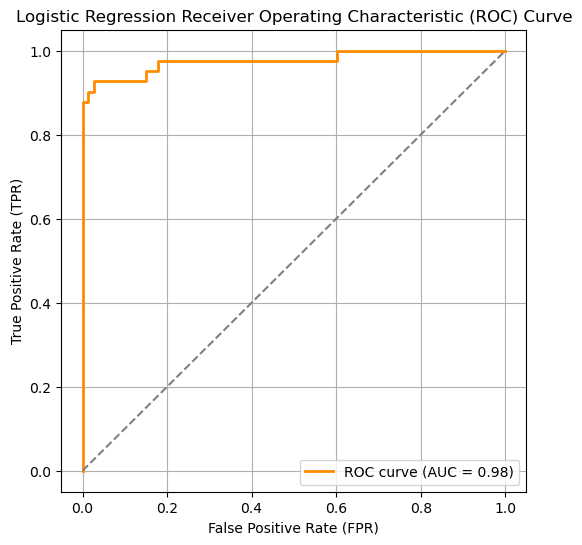

In [63]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show() # Display the plot

# 2. Random Forest

In [40]:
# Initialize Random Forest classifier with 50 trees and a fixed random state for reproducibility
RF = RandomForestClassifier(n_estimators=50,random_state=1)

In [41]:
# Train the Random Forest model on the training data
RF.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [42]:
# Predict the labels for the test data
Y_pred = RF.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [43]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        73
           1       0.94      0.83      0.88        41

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [44]:
# Calculate the training accuracy
train_acc = RF.score(X_train,Y_train)

# Calculate the testing accuracy
test_acc = accuracy_score(Y_test,Y_pred)

# Calculate recall (True Positive Rate)
recall = recall_score(Y_test,Y_pred)

# Calculate precision (Positive Predictive Value)
prec = precision_score(Y_test,Y_pred)

# Calculate F1 score (harmonic mean of precision and recall)
f1 = f1_score(Y_test,Y_pred)

# Print performance metrics
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recall)
print("Precision :", prec)

Training Accuracy : 0.9978021978021978
Testing Accuracy : 0.9210526315789473
F1 Score : 0.8831168831168831
Recall : 0.8292682926829268
Precision : 0.9444444444444444


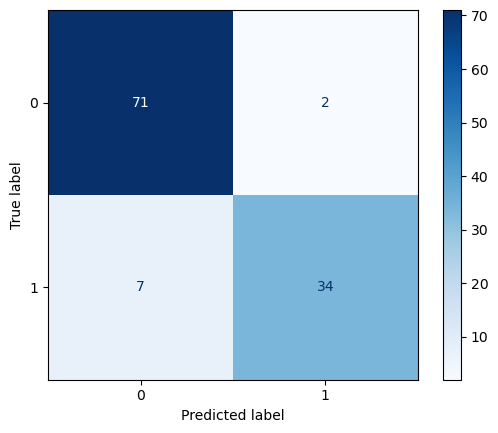

In [45]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
display.plot(cmap="Blues")
plt.show()

In [46]:
# Get predicted probabilities for the positive class
y_prob = RF.predict_proba(X_test)[:, 1]  # Probabilities for positive class (class 1)

# Calculate FPR, TPR, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_prob)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf) 
print(f"Random Forest AUC: {roc_auc_rf:.2f}")

Random Forest AUC: 0.97


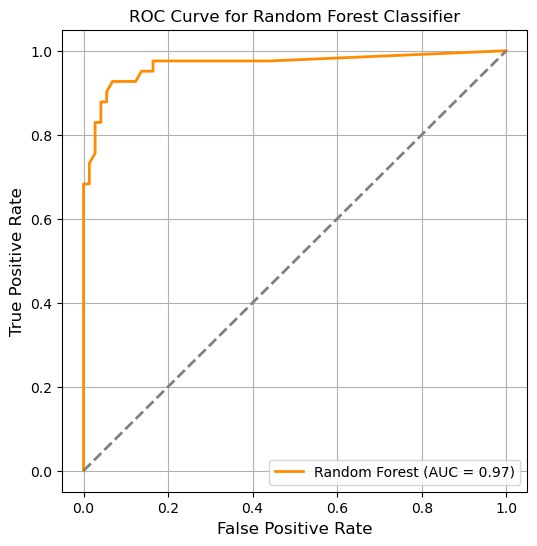

In [47]:
# Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 3. Gradient Boosting

In [48]:
# Initializing Gradient Boosting Classifier
GB = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,       # Maximum depth of individual estimators
    random_state=0
)

In [49]:
# Fitting the model on the training data
GB.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=0)

In [50]:
# Predict the labels for the test data
Y_pred_gb = GB.predict(X_test)

In [51]:
# Calculate the training accuracy
train_acc = GB.score(X_train,Y_train)

# Calculate the testing accuracy
test_acc = accuracy_score(Y_test,Y_pred_gb)

# Calculate recall (True Positive Rate)
recall = recall_score(Y_test,Y_pred_gb)

# Calculate precision (Positive Predictive Value)
prec = precision_score(Y_test,Y_pred_gb)

# Calculate F1 score (harmonic mean of precision and recall)
f1 = f1_score(Y_test,Y_pred_gb)

# Print performance metrics
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recall)
print("Precision :", prec)

Training Accuracy : 1.0
Testing Accuracy : 0.9210526315789473
F1 Score : 0.8860759493670886
Recall : 0.8536585365853658
Precision : 0.9210526315789473


In [52]:
# Classification Report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_gb))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.92      0.85      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



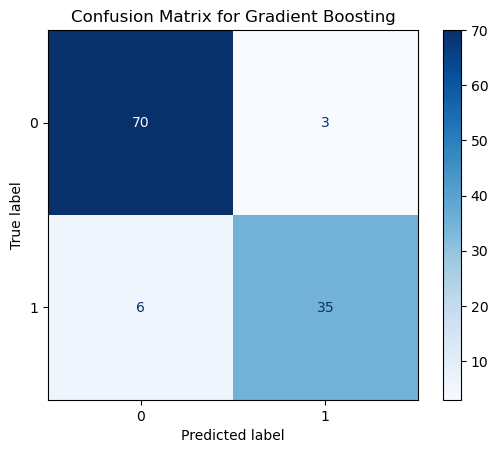

In [53]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_gb)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GB.classes_)
display.plot(cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

In [54]:
# Predict Probabilities for the Positive Class
y_scores_gb = GB.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate FPR, TPR, and thresholds
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_scores_gb)

# Compute AUC
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(f"Gradient Boosting AUC: {roc_auc_gb:.2f}")


Gradient Boosting AUC: 0.97


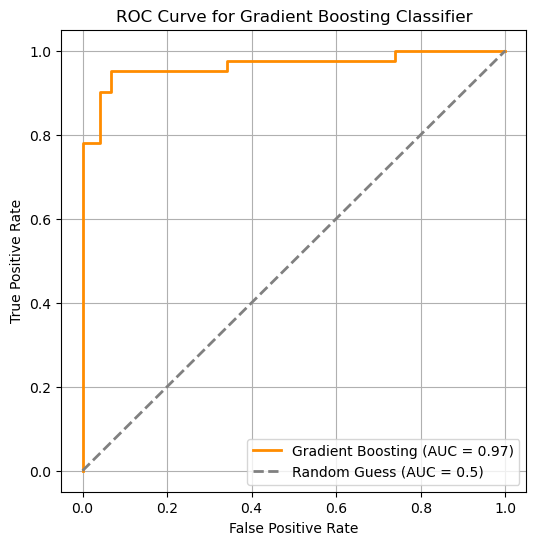

In [55]:
# Step 5: Plot the ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()